In [1]:
import sys
import pandas as pd
import numpy as np

sys.path.append('/home/yuliya/repos/cosybio/FedProt/evaluation_utils/')
from evaluation import evaluation_func as fp_eval

from collections import OrderedDict

In [2]:
color_dict = OrderedDict()

color_dict["Methods"] = OrderedDict({
    "FedProt":"black",
    "Fisher":"#E69F00",
    "Stouffer":"#D44400",
    "REM":"#009E73",
    "RankProd":"#2E5EAA"
})

# Read results

In [3]:
root_dir = "/home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/"

dfs = {}

workdir = root_dir + "01_smaller_lib_balanced_PG_MajorPG/results" 
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["TMT_balanced"] = df

workdir = root_dir + "01_smaller_lib_imbalanced_PG_MajorPG/results"
df = fp_eval.read_results(workdir,
                          deqms_name="/central_res.tsv",
                          fedprot_name="/DPE.csv")
dfs["TMT_imbalanced"] = df


print(dfs["TMT_imbalanced"].shape)
dfs["TMT_imbalanced"].head(4)

Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_balanced_PG_MajorPG/results with 325 genes. Adj.p-values were not log-transformed.
Results loaded from /home/yuliya/repos/cosybio/FedProt/evaluation/TMT_data/01_smaller_lib_imbalanced_PG_MajorPG/results with 325 genes. Adj.p-values were not log-transformed.


(325, 12)


,pv_DEqMS,lfc_DEqMS,pv_FedProt,lfc_FedProt,lfc_Fisher,pv_Fisher,lfc_REM,pv_REM,pv_Stouffer,lfc_Stouffer,pv_RankProd,lfc_RankProd
A0A075B6I9;P04211,0.000236,0.667060,0.000236,0.667060,0.660387,0.000666,0.595903,0.000006,0.000399,0.660387,0.000427,0.660387
A0A0B4J1U7,0.000101,0.884977,0.000101,0.884977,0.899263,0.000326,0.819889,0.000002,0.000141,0.899263,0.000008,0.899263
A0A0B4J1Y9,0.000387,0.585511,0.000387,0.585511,0.580111,0.001412,0.598251,0.000012,0.001478,0.580111,0.002140,0.580111
A0A0B4J2H0;A0A0C4DH29;P01742;P01743;P0DP01,0.032991,0.374793,0.032991,0.374793,0.377080,0.096704,0.358828,0.018034,0.120805,0.377080,0.028908,0.377080


# Deviations in the results of decentralized methods

First - for balanced.  
adj. p-val:
- min diff (supplementary)
- mean diff,
- max diff, 
- r, 
- rho

log2FC - same, for supplementary.
  




## stats tables

In [4]:
for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        dfs[dataset], 
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ", "RMSE", "NRMSE"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    logfc_basic_stats = fp_eval.calc_stats(
        dfs[dataset],
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=["MinDiff", "MeanDiff", "MaxDiff", "r", "ρ", "RMSE", "NRMSE"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="lfc_",
        top_genes=-1
    )

    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/pval_basic_stats.csv')
    logfc_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/logfc_basic_stats.csv')

    print(f'Dataset: {dataset}')
    print("\tLogFC basic stats:")
    print(logfc_basic_stats)
    print("\tP-value basic stats:")
    print(pval_basic_stats)        

Calculating RMSE. Using p-vals - not log-transformed.
RMSE and NRMSE computed for all genes from pv_ columns.
Calculating corrs. Using p-vals - not log-transformed.
Correlations computed for all genes from pv_ columns.
RMSE and NRMSE computed for all genes from lfc_ columns.
Correlations computed for all genes from lfc_ columns.
Calculating RMSE. Using p-vals - not log-transformed.
RMSE and NRMSE computed for all genes from pv_ columns.
Calculating corrs. Using p-vals - not log-transformed.
Correlations computed for all genes from pv_ columns.
RMSE and NRMSE computed for all genes from lfc_ columns.
Correlations computed for all genes from lfc_ columns.


Dataset: TMT_balanced
	LogFC basic stats:
           MinDiff      MeanDiff       MaxDiff         r         ρ  \
FedProt   0.000000  9.080475e-15  4.619916e-14  1.000000  1.000000   
Fisher    0.000005  1.937970e-03  4.911158e-02  0.999898  0.999830   
Stouffer  0.000005  1.937970e-03  4.911158e-02  0.999898  0.999830   
REM       0.000003  1.765403e-02  7.783829e-02  0.996807  0.995631   
RankProd  0.000005  1.937970e-03  4.911158e-02  0.999898  0.999830   

                  RMSE         NRMSE  
FedProt   1.151734e-14  1.637663e-13  
Fisher    3.813163e-03  5.421979e-02  
Stouffer  3.813163e-03  5.421979e-02  
REM       2.330716e-02  3.314072e-01  
RankProd  3.813163e-03  5.421979e-02  
	P-value basic stats:
               MinDiff      MeanDiff       MaxDiff         r         ρ  \
FedProt   0.000000e+00  3.743789e-14  5.142553e-13  1.000000  1.000000   
Fisher    8.629119e-10  1.250570e-01  9.318242e-01  0.732103  0.909934   
Stouffer  1.427968e-10  1.953377e-01  8.885049e-01  0.57706

In [5]:
for dataset in dfs:
    transfomed_dataset = dfs[dataset].copy()
    
    # transform p-values to -log10 pv_ + column["FedProt", "Fisher", "Stouffer", "REM", "RankProd"]
    # there is no function in the evaluation_utils for this, so we will do it manually
    for method in ["DEqMS", "FedProt", "Fisher", "Stouffer", "REM", "RankProd"]:
        # first replace zeros with smallest non-zero value (offset)
        offset = transfomed_dataset[f"pv_{method}"].replace(0, np.nan).min()
        transfomed_dataset[f"pv_{method}"] = transfomed_dataset[f"pv_{method}"].replace(0, offset)        
        transfomed_dataset[f"pv_{method}"] = -np.log10(transfomed_dataset[f"pv_{method}"])

    pval_basic_stats = fp_eval.calc_stats(
        transfomed_dataset, 
        lfc_thr=0.58, adj_pval_thr=0.01,
        stats=[ "MeanDiff", "MaxDiff", "r", "ρ", "RMSE", "NRMSE"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/log10pval_basic_stats.csv')
    
    print(f'Dataset: {dataset}')
    print("\tP-value basic stats:")
    # print round values to 3 digits
    print(pval_basic_stats.round(3))     
    print(pval_basic_stats)

Calculating RMSE. Using p-vals - log-transformed.
RMSE and NRMSE computed for all genes from pv_ columns.
Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.
Calculating RMSE. Using p-vals - log-transformed.
RMSE and NRMSE computed for all genes from pv_ columns.
Calculating corrs. Using p-vals - log-transformed.
Correlations computed for all genes from pv_ columns.


Dataset: TMT_balanced
	P-value basic stats:
          MeanDiff  MaxDiff      r      ρ   RMSE  NRMSE
FedProt      0.000    0.000  1.000  1.000  0.000  0.000
Fisher       0.491    2.213  0.967  0.910  0.601  0.150
Stouffer     0.569    1.694  0.966  0.869  0.659  0.164
REM          0.605    8.263  0.895  0.954  1.135  0.283
RankProd     1.199    6.967  0.744  0.824  1.791  0.446
              MeanDiff       MaxDiff         r         ρ          RMSE  \
FedProt   1.478703e-13  8.926193e-13  1.000000  1.000000  2.104366e-13   
Fisher    4.907599e-01  2.213244e+00  0.966970  0.910131  6.014004e-01   
Stouffer  5.689126e-01  1.694041e+00  0.965778  0.868816  6.592433e-01   
REM       6.051684e-01  8.262826e+00  0.894716  0.953950  1.135451e+00   
RankProd  1.199052e+00  6.966939e+00  0.744167  0.823557  1.790786e+00   

                 NRMSE  
FedProt   5.242389e-14  
Fisher    1.498206e-01  
Stouffer  1.642304e-01  
REM       2.828631e-01  
RankProd  4.461200e-01  
Dataset: TMT_imbalanced
	

### correlation plots

Plotting corrs using p-vals - log-transformed.


TMT_balanced                         TMT_imbalanced            \
                    r         ρ          RMSE              r         ρ   
FedProt      1.000000  1.000000  2.101155e-13       1.000000  1.000000   
Fisher       0.967060  0.910763  6.005088e-01       0.947434  0.886080   
Stouffer     0.965705  0.867510  6.584570e-01       0.933385  0.798039   
REM          0.894869  0.953764  1.133729e+00       0.934770  0.946535   
RankProd     0.744664  0.824501  1.788096e+00       0.750044  0.820924   

                        
                  RMSE  
FedProt   1.542469e-13  
Fisher    4.893030e-01  
Stouffer  6.069506e-01  
REM       5.853680e-01  
RankProd  7.943496e-01

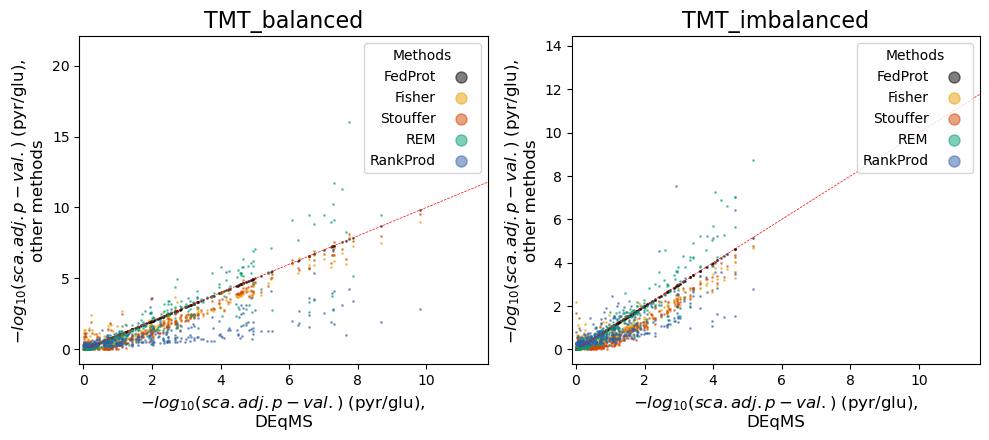

In [6]:
# log transform p-values in dfs, but first replace 0 with tiny value
log_dfs = {}
for k in dfs:
    df = dfs[k]
    df = df.replace(0,1e-300)
    df["pv_DEqMS"] = -np.log10(df["pv_DEqMS"])
    for m in ["FedProt", "Fisher","Stouffer","REM","RankProd"]:
        df["pv_"+m] = -np.log10(df["pv_"+m])
    log_dfs[k] = df

fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["TMT_balanced", "TMT_imbalanced"],
    add_table=False
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using p-vals - log-transformed.


TMT_balanced                         TMT_imbalanced            \
                    r         ρ          RMSE              r         ρ   
FedProt      1.000000  1.000000  2.101155e-13       1.000000  1.000000   
Fisher       0.967060  0.910763  6.005088e-01       0.947434  0.886080   
Stouffer     0.965705  0.867510  6.584570e-01       0.933385  0.798039   
REM          0.894869  0.953764  1.133729e+00       0.934770  0.946535   
RankProd     0.744664  0.824501  1.788096e+00       0.750044  0.820924   

                        
                  RMSE  
FedProt   1.542469e-13  
Fisher    4.893030e-01  
Stouffer  6.069506e-01  
REM       5.853680e-01  
RankProd  7.943496e-01

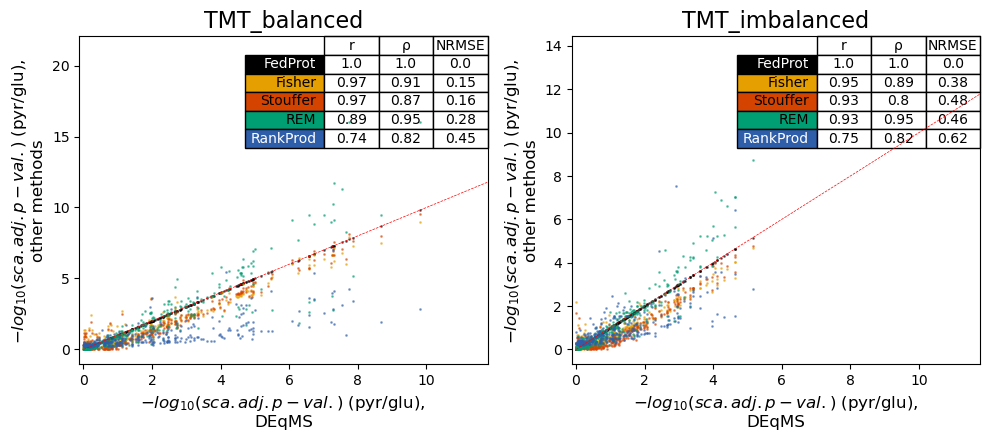

In [7]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="pv_", 
    text="", dotsize=1,
    datasets=["TMT_balanced", "TMT_imbalanced"],
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

Plotting corrs using logFC values.


TMT_balanced                         TMT_imbalanced            \
                    r         ρ          RMSE              r         ρ   
FedProt      1.000000  1.000000  1.150679e-14       1.000000  1.000000   
Fisher       0.999899  0.999831  3.807333e-03       0.999377  0.998968   
Stouffer     0.999899  0.999831  3.807333e-03       0.999377  0.998968   
REM          0.996847  0.995671  2.327600e-02       0.994817  0.993744   
RankProd     0.999899  0.999831  3.807333e-03       0.999377  0.998968   

                        
                  RMSE  
FedProt   1.317833e-14  
Fisher    9.185856e-03  
Stouffer  9.185856e-03  
REM       2.742610e-02  
RankProd  9.185856e-03

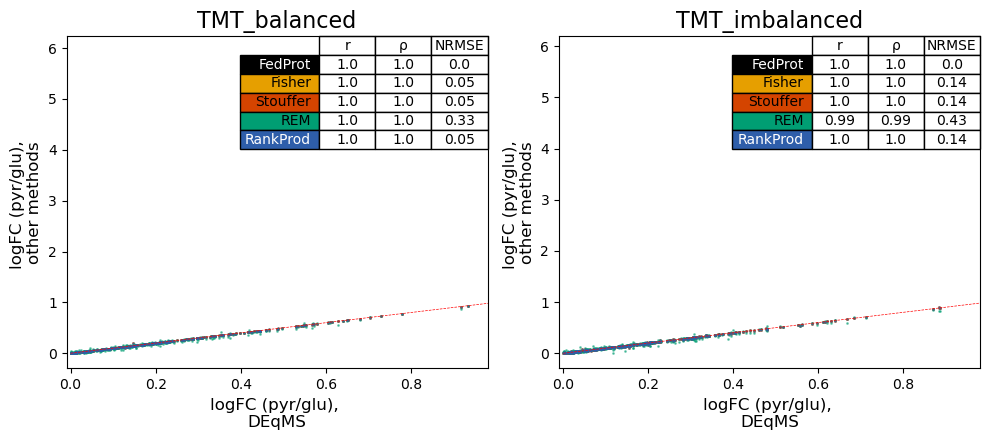

In [9]:
fp_eval.plt_results(
    log_dfs, 
    methods=["FedProt","Fisher","Stouffer","REM","RankProd"],
    color_dict=color_dict,
    what="lfc_", 
    text="", dotsize=1,
    datasets=["TMT_balanced", "TMT_imbalanced"],
    add_table=True
)

# plt.savefig("/home/yuliya/repos/cosybio/FedDEqMS/data/04_evaluation/plots/" + "Fig3B_prototype.png", dpi=1200)

# The consistency of differentially expressed protein lists


In [12]:
# calculate FP, FN and F1

for dataset in dfs:
    pval_basic_stats = fp_eval.calc_stats(
        log_dfs[dataset], 
        lfc_thr=0.25, adj_pval_thr=0.05,
        stats=["FP", "FN", "F1", "MCC"],
        methods=["FedProt", "Fisher", "Stouffer", "REM", "RankProd"],
        column_name="pv_",
        top_genes=-1
    )
    print(f'Dataset: {dataset}')
    print("\tFP, FN and F1:")
    print(pval_basic_stats)

    pval_basic_stats.to_csv(f'{root_dir}/{dataset}/results_tables/fp_fn_f1.csv')

Performance metrics calculated for all genes.
Performance metrics calculated for all genes.


Dataset: TMT_balanced
	FP, FN and F1:
           FP    FN        F1       MCC
FedProt   0.0   0.0  1.000000  1.000000
Fisher    0.0   4.0  0.977528  0.969524
Stouffer  0.0   8.0  0.954023  0.939115
REM       2.0   6.0  0.955056  0.938568
RankProd  2.0  20.0  0.865854  0.830233
Dataset: TMT_imbalanced
	FP, FN and F1:
            FP    FN        F1       MCC
FedProt    0.0   0.0  1.000000  1.000000
Fisher     1.0  18.0  0.863309  0.836939
Stouffer   1.0  22.0  0.829630  0.801731
REM        4.0  10.0  0.906667  0.879914
RankProd  14.0  22.0  0.756757  0.686997


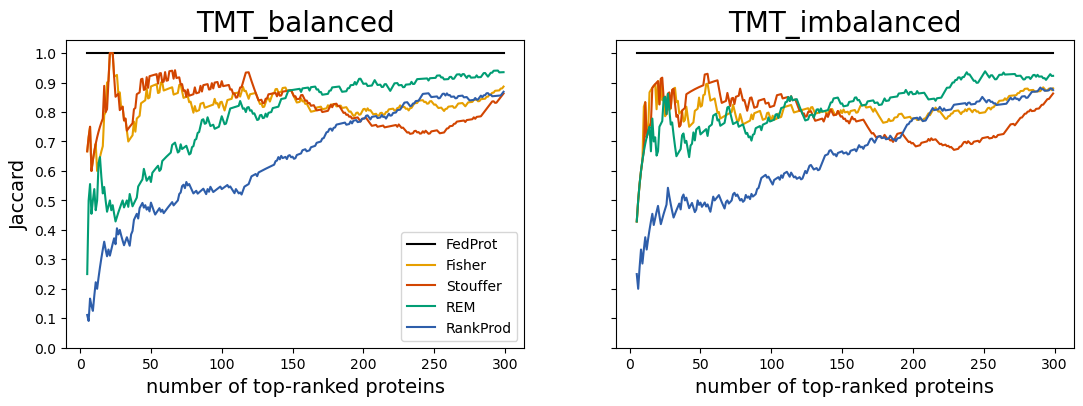

In [15]:
min_n_genes = 5
step = 1
max_n_genes = 300

data = fp_eval.plot_stats_for_topN(
    log_dfs,
    datasets = ["TMT_balanced", "TMT_imbalanced"],
    methods=["FedProt", "Fisher","Stouffer","REM","RankProd"],
    metrics=["Jaccard"],
    min_n_genes=min_n_genes,
    max_n_genes=max_n_genes,
    step=step,
    color_dict=color_dict,
    sharey=True
    )

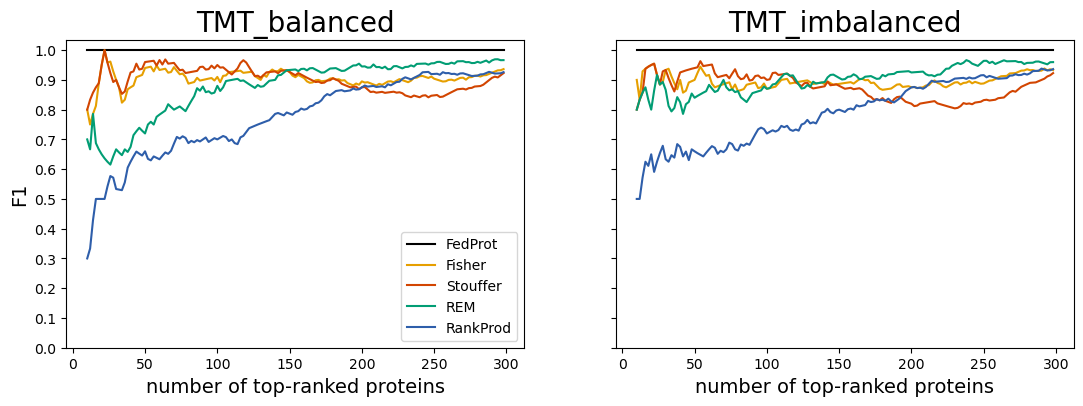

In [14]:
min_n_genes = 10
step = 2
max_n_genes = 300

data = fp_eval.plot_stats_for_topN(
    log_dfs,
    datasets = ["TMT_balanced", "TMT_imbalanced"],
    methods=["FedProt", "Fisher","Stouffer","REM","RankProd"],
    metrics=["F1"],
    min_n_genes=min_n_genes,
    max_n_genes=max_n_genes,
    step=step,
    color_dict=color_dict,
    sharey=True
    )